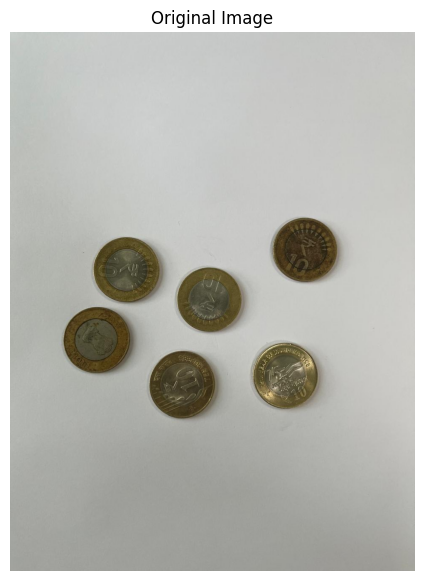

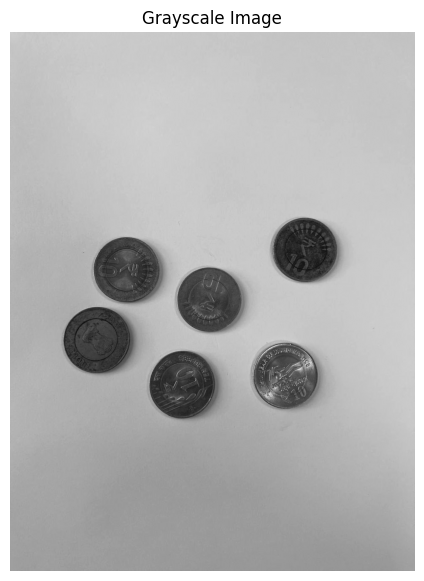

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/sample image 4.jpeg"
image = cv2.imread(image_path)

# Showing Original image
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

# Showing Grayscale image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(7,7))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

Here the Hyperparameteres i.e the kernel size, standard deviation of the kernel, and hysterisis thresholding can be tuned for different kinds of outputs.

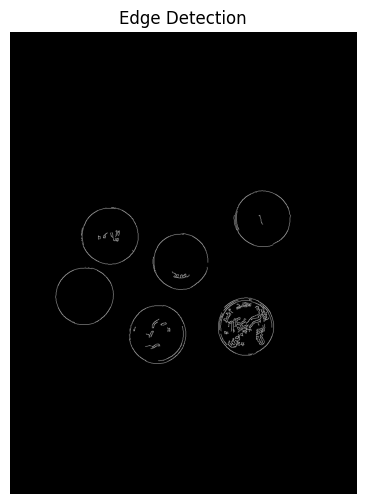

In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 6.0)
edges = cv2.Canny(blurred, 40, 120)
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()


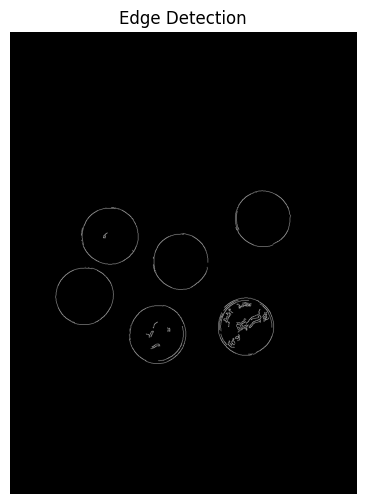

In [ ]:
# Higher limit of Hysterisis thresholding changed to 150
blurred = cv2.GaussianBlur(gray, (5, 5), 6.0)
edges = cv2.Canny(blurred, 40, 150)
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()

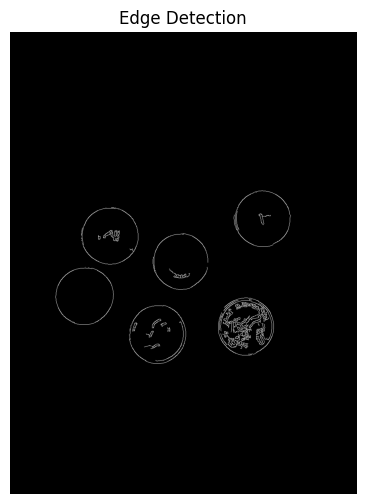

In [ ]:
# Lower Limit of Hysterisis thresholding changed to 20.
blurred = cv2.GaussianBlur(gray, (5, 5), 6.0)
edges = cv2.Canny(blurred, 20, 120)
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()

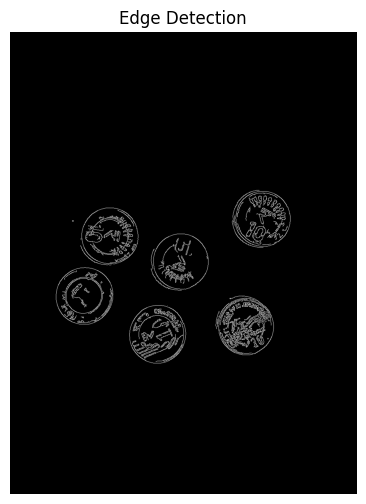

In [ ]:
# using a 3 X 3 kernel with standard deviation set on automatic
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edges = cv2.Canny(blurred, 40, 120)
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()

Centres: [[ 56  81  91]
 [176 181 180]
 [193 197 196]]


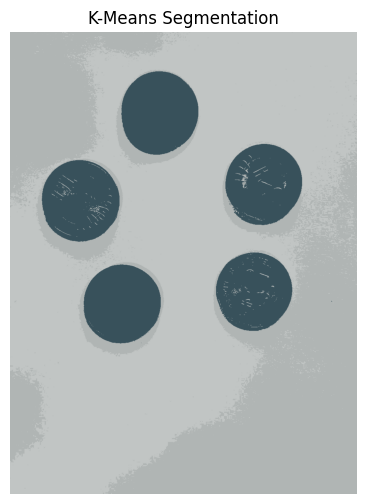

In [ ]:

image_path2 = "/content/sample image 5.jpeg"
image2 = cv2.imread(image_path2)

pixels = image2.reshape((-1, 3))
pixels = np.float32(pixels)
K = 3
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print("Centers:", centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image2.shape)

plt.figure(figsize=(6,6))
plt.imshow(segmented_image)
plt.title("K-Means Segmentation")
plt.axis("off")
plt.show()


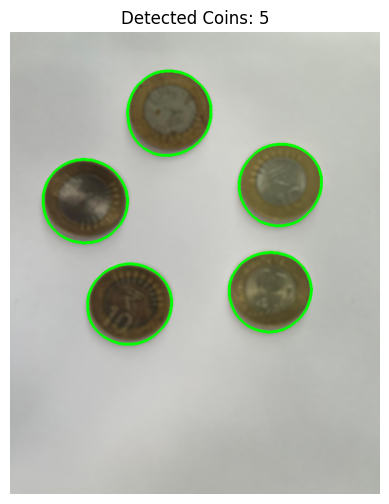

Total number of coins detected: 5


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/sample image 5.jpeg"
img = cv2.resize(img, (640, 800))
image_copy = img.copy()
img = cv2.GaussianBlur(img, (7, 7), 3)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
area = {}
for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar
sorted_contours = sorted(area.items(), key=lambda x: x[1], reverse=True)
results = np.array(sorted_contours).astype("int")
num = np.argwhere(results[:, 1] > 500).shape[0]  # Count objects with area > 500

for i in range(1, num):
    cv2.drawContours(image_copy, contours, results[i, 0], (0, 255, 0), 3)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Coins: {num - 1}")
plt.axis("off")
plt.show()


print(f"Total number of coins detected: {num - 1}")


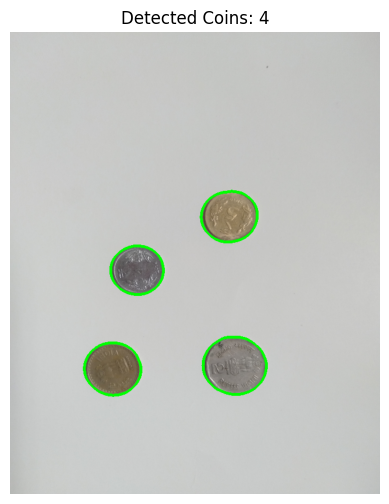

Total number of coins detected: 4


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/one.jpg"

img = cv2.resize(img, (640, 800))
image_copy = img.copy()

img = cv2.GaussianBlur(img, (7, 7), 3)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

area = {}
for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar

sorted_contours = sorted(area.items(), key=lambda x: x[1], reverse=True)
results = np.array(sorted_contours).astype("int")

num = np.argwhere(results[:, 1] > 500).shape[0]

for i in range(1, num):
    cv2.drawContours(image_copy, contours, results[i, 0], (0, 255, 0), 3)


plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Coins: {num - 1}")
plt.axis("off")
plt.show()

print(f"Total number of coins detected: {num - 1}")


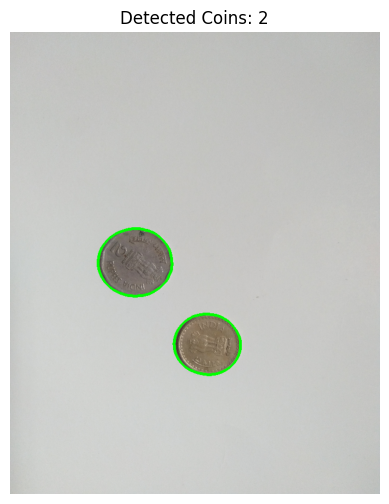

Total number of coins detected: 2


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/two.jpg"
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found! Check the file path.")

img = cv2.resize(img, (640, 800))
image_copy = img.copy()

img = cv2.GaussianBlur(img, (7, 7), 3)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

area = {}
for i in range(len(contours)):
    cnt = contours[i]
    ar = cv2.contourArea(cnt)
    area[i] = ar

sorted_contours = sorted(area.items(), key=lambda x: x[1], reverse=True)
results = np.array(sorted_contours).astype("int")

num = np.argwhere(results[:, 1] > 500).shape[0]

for i in range(1, num):
    cv2.drawContours(image_copy, contours, results[i, 0], (0, 255, 0), 3)


plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Coins: {num - 1}")
plt.axis("off")
plt.show()


print(f"Total number of coins detected: {num - 1}")
